In [ ]:
!pip install tensorflow==2.7 keras gdown

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement tensorflow==2.7 (from versions: 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0, 2.11.1, 2.12.0rc0, 2.12.0rc1, 2.12.0, 2.13.0rc0, 2.13.0rc1)
ERROR: No matching distribution found for tensorflow==2.7


In [ ]:
!gdown 1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz

Downloading...
From: https://drive.google.com/uc?id=1T5Cm4Tt1sO21ARz6BvStSW4yks118rRz
To: /content/small_data_set.zip
100% 2.07G/2.07G [00:22<00:00, 93.3MB/s]


Dataset extracted successfully.
Found 200 images belonging to 5 classes.
Found 50 images belonging to 5 classes.
Data prepared for training and validation. Number of classes: 5
Deep neural network model created and compiled.
Epoch 1/10
7/7 [==============================] - 178s 27s/step - loss: 1.8134 - accuracy: 0.2000 - val_loss: 1.5921 - val_accuracy: 0.2400
Epoch 2/10
7/7 [==============================] - 151s 22s/step - loss: 1.5485 - accuracy: 0.2750 - val_loss: 1.5226 - val_accuracy: 0.2600
Epoch 3/10
7/7 [==============================] - 135s 19s/step - loss: 1.4679 - accuracy: 0.3150 - val_loss: 1.4927 - val_accuracy: 0.2400
Epoch 4/10
7/7 [==============================] - 160s 26s/step - loss: 1.3612 - accuracy: 0.3950 - val_loss: 1.3582 - val_accuracy: 0.4000
Epoch 5/10
7/7 [==============================] - 162s 26s/step - loss: 1.2596 - accuracy: 0.4650 - val_loss: 1.4307 - val_accuracy: 0.3800
Epoch 6/10
7/7 [==============================] - 156s 23s/step - loss: 1.0

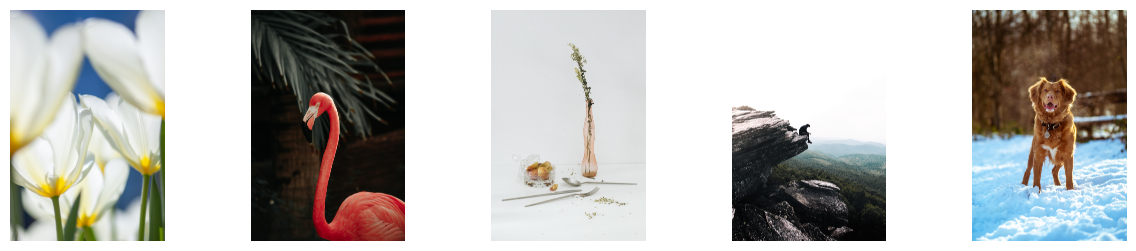

Model trained successfully.


In [ ]:
import zipfile
import os
import shutil
from google.colab import drive
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import random
import matplotlib.pyplot as plt


class ImageClassifier:
    def __init__(self, zip_file_path, dataset_folder="dataset", image_size=(150, 150), batch_size=32):
        self.zip_file_path = zip_file_path
        self.dataset_folder = dataset_folder
        self.image_size = image_size
        self.batch_size = batch_size

    def extract_zip(self):
        with zipfile.ZipFile(self.zip_file_path, 'r') as zip_ref:
            zip_ref.extractall(self.dataset_folder)
        print("Dataset extracted successfully.")

    def prepare_data(self):
        data_gen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

        self.train_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="training"
        )

        self.validation_data = data_gen.flow_from_directory(
            self.dataset_folder,
            target_size=self.image_size,
            batch_size=self.batch_size,
            class_mode="categorical",
            subset="validation"
        )
        self.num_classes = len(self.train_data.class_indices)
        print(f"Data prepared for training and validation. Number of classes: {self.num_classes}")

    def create_model(self):
        self.model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation="relu", input_shape=(*self.image_size, 3)),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation="relu"),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(512, activation="relu"),
            layers.Dense(self.num_classes, activation="softmax")
        ])

        self.model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="categorical_crossentropy", metrics=["accuracy"])
        print("Deep neural network model created and compiled.")

    def visualize_images(self):
        # Select 5 random images from the validation dataset
        sample_images = random.sample(self.validation_data.filepaths, 5)

        # Plot the selected images
        fig, axes = plt.subplots(1, 5, figsize=(15, 3))
        for i, image_path in enumerate(sample_images):
            img = plt.imread(image_path)
            axes[i].imshow(img)
            axes[i].axis("off")
        plt.show()

    def train(self, epochs=10):
        self.model.fit(
            self.train_data,
            epochs=epochs,
            validation_data=self.validation_data
        )
        self.visualize_images()

        print("Model trained successfully.")

zip_file_path = "/content/small_data_set.zip"

classifier = ImageClassifier(zip_file_path)
classifier.extract_zip()
classifier.prepare_data()
classifier.create_model()
classifier.train()